# Get class names

In [8]:
import os
import numpy as np
import pandas as pd
from PIL import Image

classes = [x[1] for x in os.walk("dataset_v2\\root\\train")][1]
dummy = pd.get_dummies(pd.DataFrame(classes))
dummy.head()

,0_ac_vents,0_black,0_blue,0_bus,0_cement_mixer,0_crane_truck,0_dedicated_agricultural_vehicle,0_enclosed_box,0_enclosed_cab,0_flatbed,...,0_small_vehicle,0_soft_shell_box,0_spare_wheel,0_sunroof,0_tanker,0_truck,0_van,0_white,0_wrecked,0_yellow
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Resize image and convert to np array

In [48]:
def convert(image_path):
    target_shape = (224, 224)

    return np.asarray(Image.open(image_path).resize(target_shape))[:,:,:3]

def get_countlist():
    countlist = []

    for i, klasse in enumerate(classes):
        output = os.listdir(".\\dataset_v2\\root\\train\\classes\\{}".format(klasse))    
        path, dirs, files = next(os.walk(".\\dataset_v2\\root\\train\\classes\\{}".format(klasse)))
        file_count = len(files)
        print(f"Class: {i} - {file_count}\t - {classes[i]}")
        countlist.append(file_count)
    
    return countlist

# Set countlist

In [49]:
countlist = get_countlist()

Class: 0 - 72	 - ac_vents
Class: 1 - 1158	 - black
Class: 2 - 742	 - blue
Class: 3 - 53	 - bus
Class: 4 - 17	 - cement_mixer
Class: 5 - 16	 - crane_truck
Class: 6 - 5	 - dedicated_agricultural_vehicle
Class: 7 - 133	 - enclosed_box
Class: 8 - 172	 - enclosed_cab
Class: 9 - 77	 - flatbed
Class: 10 - 97	 - green
Class: 11 - 4	 - harnessed_to_a_cart
Class: 12 - 3080	 - hatchback
Class: 13 - 865	 - jeep
Class: 14 - 2	 - ladder
Class: 15 - 506	 - large_vehicle
Class: 16 - 164	 - light_truck
Class: 17 - 383	 - luggage_carrier
Class: 18 - 25	 - minibus
Class: 19 - 586	 - minivan
Class: 20 - 256	 - open_cargo_area
Class: 21 - 626	 - other
Class: 22 - 435	 - pickup
Class: 23 - 44	 - prime_mover
Class: 24 - 414	 - red
Class: 25 - 5783	 - sedan
Class: 26 - 3505	 - silver_grey
Class: 27 - 11111	 - small_vehicle
Class: 28 - 30	 - soft_shell_box
Class: 29 - 181	 - spare_wheel
Class: 30 - 853	 - sunroof
Class: 31 - 3	 - tanker
Class: 32 - 179	 - truck
Class: 33 - 362	 - van
Class: 34 - 4817	 - white


In [50]:
def generate_datasets():
    class_limit = 10 # max 37
    output_limit = 20
    split_ratio = 0.8 # training ratio

    trainlist = []
    trainclass = []
    testlist = []
    testclass = []

    for i, klasse in enumerate(classes[:class_limit]):
        output = os.listdir(".\\dataset_v2\\root\\train\\classes\\{}".format(klasse))    
        output_limit = countlist[i] * split_ratio 

        print(f"Class: {i} - {int(output_limit)}/{countlist[i]}\t - {classes[i]}")

        # Loop for training data
        for image_path in output[:int(output_limit)]:
            trainlist.append(convert(".\\dataset_v2\\root\\train\\classes\\{}\\{}".format(klasse, image_path)))
            trainclass.append(klasse)

        # Loop for test data
        for image_path in output[int(output_limit):]:
            testlist.append(convert(".\\dataset_v2\\root\\train\\classes\\{}\\{}".format(klasse, image_path)))
            testclass.append(klasse)

    trainlist = np.asarray(trainlist)
    testlist = np.asarray(testlist)
    train_oh = pd.get_dummies(pd.DataFrame(trainclass)).values
    test_oh = pd.get_dummies(pd.DataFrame(testclass)).values

    return trainlist, testlist, train_oh, test_oh
    
x_train, x_test, y_train, y_test = generate_datasets()    

Class: 0 - 57/72	 - ac_vents
Class: 1 - 926/1158	 - black
Class: 2 - 593/742	 - blue
Class: 3 - 42/53	 - bus
Class: 4 - 13/17	 - cement_mixer
Class: 5 - 12/16	 - crane_truck
Class: 6 - 4/5	 - dedicated_agricultural_vehicle
Class: 7 - 106/133	 - enclosed_box
Class: 8 - 137/172	 - enclosed_cab
Class: 9 - 61/77	 - flatbed


[1 0 0 0 0 0 0]


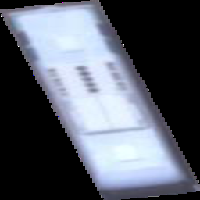

In [46]:
i = 45
print(y_train[i])
Image.fromarray(x_train[i], 'RGB')

[0 0 0 0 0 0 0 0 1 0]


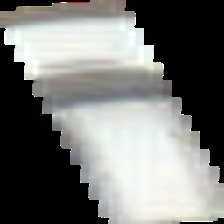

In [52]:
i = 450
print(y_test[i])
Image.fromarray(x_test[i], 'RGB')